# Projeto COVID-19
## Digital Innovation One


Primeiro vamos importar algumas das bibliotecas necessárias para o projeto

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


In [6]:
# Importando os dados para o projeto
url = 'https://raw.githubusercontent.com/neylsoncrepalde/projeto_eda_covid/master/covid_19_data.csv'

In [8]:
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [9]:
# Conferir os tipos de cada coluna
df.dtypes


SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
import re

def formatColumnsNames(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()
        

In [11]:
formatColumnsNames("AdgE/P ou") # testando a função criada

'adgepou'

In [14]:
# Vamos corrigir todas as colunas do df
df.columns = [formatColumnsNames(col) for col in df.columns]
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


# Brasil
Vamos selecionar apenas os dados do Brasil para investigar

In [16]:
df.countryregion.unique()


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [17]:
df.loc[df.countryregion == "Brazil"]

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [19]:
brazil = df.loc[
    (df.countryregion == "Brazil") &
    (df.confirmed > 0)
]

brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos confirmados

In [34]:
# Gráfico da evolução dos casos confirmados
px.line(brazil, x='observationdate', y='confirmed', title='Casos confirmados no Brasil')


# Novos casos por dia

In [25]:
brazil.shape

(84, 8)

In [32]:
# Técnica de programação funcional

brazil['newscases'] = list(map(
    lambda x: 0 if(x == 0) else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])
))

C:\Users\lidia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
px.line(brazil, x='observationdate', y='newscases', title='Novos casos por dia')

# Mortes

In [37]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brazil.observationdate, y=brazil.deaths, name='Mortes',
              mode='lines+markers', line={'color': 'red'})
)

# Layout
fig.update_layout(title='Mortes por COVID-19 no Brasil')

fig.show()

# Taxa de crescimento
growth_rate = (presente/passado**(1/n) -1)

In [39]:
def growth_rate(data, variable, start_date=None, end_date=None): 
        # Se data início for None, efine como a primeira data disponível
        if start_date == None:
            start_date = data.observationdate.loc[data[variable] > 0].min()
        else:
            start_date = pd.to_datetime(start_date)
        
        if end_date == None:
            end_date = data.observationdate.iloc[-1]
        else:
            end_date = pd.to_datetime(end_date)
            
        # Define os valores do presente e passado
        past = data.loc[data.observationdate == start_date, variable].values[0]
        present = data.loc[data.observationdate == end_date, variable].values[0]
        
        # Define o número de pontos no tempo que vamos avaliar
        number_of_days = (end_date - start_date).days
        
        # Calcular a taxa
        rate = (present/past) ** (1/number_of_days) -1
        
        return rate*100
        

In [40]:
# Taxa de crescimento médio do COVID no Brasil em todo o período
growth_rate(brazil, 'confirmed')

16.27183353112116

Crescimento de 16,27% ao dia no período

In [44]:
def daily_growth_rate(data, variable, start_date=None):
    # Se data início for None, efine como a primeira data disponível
    if start_date == None:
        start_date = data.observationdate.loc[data[variable] > 0].min()
    else:
        start_date = pd.to_datetime(start_date)
    
    end_date = data.observationdate.max()
    
    # Define o número de pontos no tempo que vamos avaliar
    number_of_days = (end_date - start_date).days
        
    # Taxa calculada de um dia para o outro: (hoje - ontem)/ontem
    rates = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, number_of_days + 1)
    ))
    
    return np.array(rates) * 100
        

In [45]:
daily_rate = daily_growth_rate(brazil, 'confirmed')
daily_rate

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [47]:
first_day = brazil.observationdate.loc[brazil.confirmed > 0].min()

px.line(x=pd.date_range(first_day, brazil.observationdate.max())[1:],
        y=daily_rate, title='Taxa de crescimento de casos confirmados no Brasil')

# Predições
    

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [58]:
cases_confirmed = brazil.confirmed 
cases_confirmed.index = brazil.observationdate
cases_confirmed

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [59]:
results = seasonal_decompose(cases_confirmed)
results

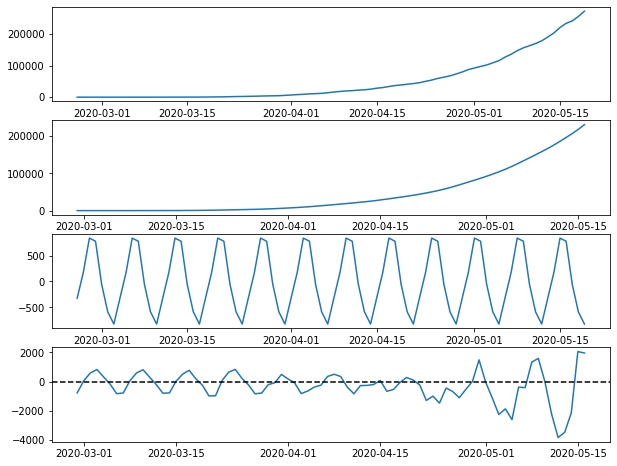

In [60]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(results.observed)
ax2.plot(results.trend)
ax3.plot(results.seasonal)
ax4.plot(cases_confirmed.index, results.resid)
ax4.axhline(0, linestyle='dashed', c='black')

plt.show()

# Modelagem
## ARIMA: estima o futuro a partir do passado 

In [61]:
!pip install pmdarima

In [63]:
from pmdarima.arima import auto_arima


In [64]:
modelo = auto_arima(cases_confirmed)

C:\Users\lidia\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\lidia\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\lidia\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\lidia\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\lidia\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\lidia\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary startin

In [68]:
fig = go.Figure(go.Scatter(
    x = cases_confirmed.index, y = cases_confirmed, name='Observados'
))

fig.add_trace(go.Scatter(
    x = cases_confirmed.index, y = modelo.predict_in_sample(), name='Preditos' 
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasi para os próximos 30 dias')
fig.show()

# Modelo de crescimento

In [69]:
!conda install -c conda-forge fbprophet -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lidia\anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.1 MB  conda-forge
    convertdate-2.2.1          |     pyh9f0ad1d_0          33 KB  conda-forge
    ephem-3.7.7.1              |   py37hfa6e2cd_0         741 KB  conda-forge
    fbprophet-0.6              |   py37h6538335_0         521 KB  conda-forge
    holidays-0.10.3            |     pyh9f0ad1d_0          61 KB  conda-forge
    korean_lunar_calendar-0.2.1|     pyh9f0ad1d_0          10 KB  conda-forge
    libpython-2.0              |   py37hc8dfbb8_0          48 KB  conda-forge
    lunarcalendar-0.0.9        |             py_0          20 KB  conda-forge
    m2w64-binutils-2.25.1      |                5        44.3 MB
    m2w64-bzi

In [70]:
from fbprophet import Prophet

In [74]:
# Preprocessamentos

train = cases_confirmed.reset_index()[:-5]
test = cases_confirmed.reset_index()[-5:]

# Renomeando colunas
train.rename(columns={'observationdate': 'ds', 'confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate': 'ds', 'confirmed':'y'}, inplace=True)

# Definir o modelo de crescimento
prophet_model = Prophet(growth='logistic', changepoints=['2020-03-21', 
                                                         '2020-03-30',
                                                         '2020-04-25',
                                                         '2020-05-03',
                                                         '2020-05-10'])


# População brasileira segundo projeção do IBGE
pop = 211463256
train['cap'] = pop

# Treinar o modelo
prophet_model.fit(train)

# Construir previsões para o futuro
future_dates = prophet_model.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = prophet_model.predict(future_dates)


INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [76]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.index, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()